## Linear regression extended

- learning rate
- Computing linear regression using gradient descent based on the multi variable training data set
- Feature engineering
- Polynomial regression

In [2]:
import sys
import os
import json
import numpy as np
import importlib

from fontTools.misc.bezierTools import epsilon

module_path = os.path.abspath(os.path.join('..', 'jantools'))

if module_path not in sys.path:
    sys.path.append(module_path)

import linear_regression_singlevar as lnrgsv

#### Load training data set

In [48]:
file_path = "../data/linear_regression_singlevar.json"

with open(file_path, "r") as f:
    data = json.load(f)

# Convert to NumPy arrays
x = np.array([item["x"] for item in data]).reshape(-1, 1)  # shape (n_samples, 1)
y = np.array([item["y"] for item in data])                  # shape (n_samples,)

#### Examining learning rates

In [57]:
%%capture
w_coefficients = []
b_coefficients = []
costs = []
rates = []

for i in range(1,14):
    rates.append(10**(-i))

for i in rates:
    w,b,stepsW,stepsB,computed_costs=lnrgsv.run_gradient_descent(x,y,0,0,i,50)

    costs.append(computed_costs)
    w_coefficients.append(w)
    b_coefficients.append(b)


C:\Users\janfi\AppData\Local\Temp\ipykernel_14448\4271634277.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  return plt.cm.get_cmap(name, n)


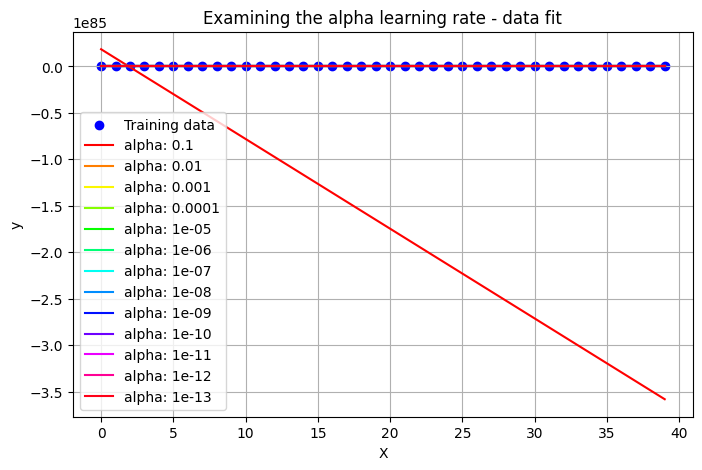

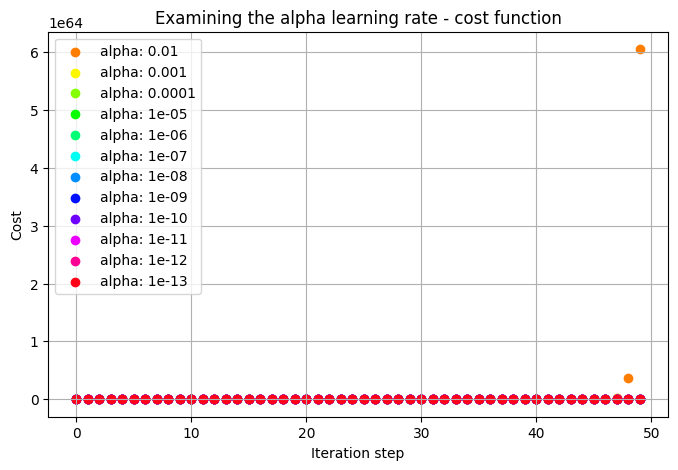

In [60]:
import matplotlib.pyplot as plt

def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(len(rates))

plt.figure(figsize=(8,5))
plt.scatter(x, y, color='blue', label='Training data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Examining the alpha learning rate - data fit')

for i in range (len(rates)):
    plt.plot(x, w_coefficients[i]*x+b_coefficients[i],color=cmap(i),label=str('alpha: '+str(rates[i])))

plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.xlabel('Iteration step')
plt.ylabel('Cost')
plt.title('Examining the alpha learning rate - cost function')

for i in range (1,len(rates)):
    plt.scatter(np.arange(len(costs[i])), costs[i],color=cmap(i),label=str('alpha: '+str(rates[i])))
plt.legend()
plt.grid(True)
plt.show()
